In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1. 벡터 생성 및 시각화

In [6]:
asList = [1, 2, 3, 4]

asArray = torch.Tensor(asList)
rowVec = asArray.unsqueeze(0) # 0번째 인덱스에 크기가 1인 새로운 차원 추가
colVec = rowVec.T # Transpose

print(f"asArray shape: {asArray.shape}") # 방향 X
print(f"rowVec shape: {rowVec.shape}")
print(f"colVec shape: {colVec.shape}")

asArray shape: torch.Size([4])
rowVec shape: torch.Size([1, 4])
colVec shape: torch.Size([4, 1])


## 2. 벡터 연산

In [7]:
# broadcasting
v = torch.Tensor([[1, 2, 3]]).T
w = torch.Tensor([[10, 20]])

print(f'{v + w}')

tensor([[11., 21.],
        [12., 22.],
        [13., 23.]])


In [8]:
# Scalar Multiplication
s = 2

asList = [1, 2, 3]
asArray = torch.tensor(asList)

print(asList * s) # 리스트 반복
print(asArray * s) # 원소 곱

[1, 2, 3, 1, 2, 3]
tensor([2, 4, 6])


## 3. 벡터 크기와 단위 벡터

In [10]:
v = torch.Tensor([1, 2, 3, 4, 5, 6])
dim = len(v)
mag = torch.norm(v)

print(f"dim: {dim}, norm: {mag:.4f}")

dim: 6, norm: 9.5394


## 4. 내적

In [14]:
a = torch.Tensor([1, 2, 3])
b = torch.Tensor([4, 5, 6])

torch.dot(a, b) # 입력 차원 : 1-d

tensor(32.)

## 5. 그 외 벡터 곱셈

In [15]:
# 아다마르 곱
a = torch.Tensor([1, 2, 3, 4])
b = torch.Tensor([5, 6, 7, 8])

a * b

tensor([ 5., 12., 21., 32.])

In [25]:
# 외적
a = torch.Tensor([1, 2, 3])
b = torch.Tensor([4, 5])

torch.outer(a, b) # 1-d 입력만 허용 (torch.cross의 경우, 3-d 입력만 허용)

tensor([[ 4.,  5.],
        [ 8., 10.],
        [12., 15.]])

## 6. 직교벡터 분해

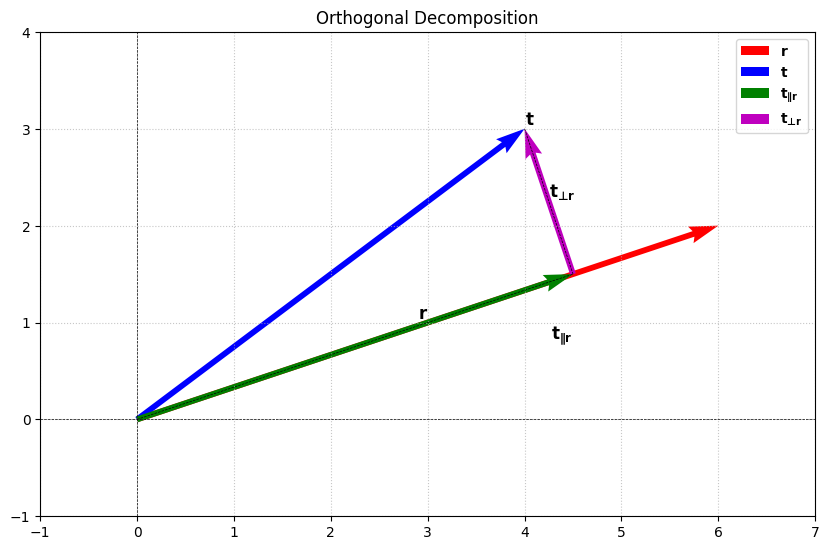

In [34]:
vec_r = np.array([6, 2])
vec_t = np.array([4, 3])

# 벡터 계산
r_unit = vec_r / np.linalg.norm(vec_r)
r_para = np.dot(vec_t, r_unit) * r_unit
r_perp = vec_t - r_para

# 그래프 설정
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_aspect('equal')
plt.xlim(-1, 7)
plt.ylim(-1, 4)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle=':', alpha=0.7)

# 벡터 그리기
plt.quiver(0, 0, vec_r[0], vec_r[1], angles='xy', scale_units='xy', scale=1, color='r', label=r'$\mathbf{r}$')
plt.quiver(0, 0, vec_t[0], vec_t[1], angles='xy', scale_units='xy', scale=1, color='b', label=r'$\mathbf{t}$')
plt.quiver(0, 0, r_para[0], r_para[1], angles='xy', scale_units='xy', scale=1, color='g', label=r'$\mathbf{t_{∥r}}$')
plt.quiver(r_para[0], r_para[1], r_perp[0], r_perp[1], angles='xy', scale_units='xy', scale=1, color='m', label=r'$\mathbf{t_{⊥r}}$')

# 점선 그리기
plt.plot([vec_t[0], r_para[0]], [vec_t[1], r_para[1]], 'k--', linewidth=0.5)
plt.plot([0, r_para[0]], [0, r_para[1]], 'k--', linewidth=0.5)

# 텍스트 추가 (위치 조정)
plt.text(vec_r[0]/2, vec_r[1]/2, r'$\mathbf{r}$', fontsize=12, ha='right', va='bottom')
plt.text(vec_t[0], vec_t[1], r'$\mathbf{t}$', fontsize=12, ha='left', va='bottom')
plt.text(r_para[0], r_para[1]/2, r'$\mathbf{t_{∥r}}$', fontsize=12, ha='right', va='bottom')
plt.text((r_para[0]+vec_t[0])/2, (r_para[1]+vec_t[1])/2, r'$\mathbf{t_{⊥r}}$', fontsize=12, ha='left', va='bottom')

plt.title('Orthogonal Decomposition')
plt.legend()
plt.show()